In [4]:
import pandas as pd #to make the dataframes
import numpy as np #to create and deal with NumPy arrays
import seaborn as sns #for graphical representation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #for training testing dataset splitting
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Preprocessing

**Step 1: Import the dataset**

In [5]:
df=pd.read_csv('/content/car_prediction_data.csv')

**Step 2: Get the head/tail tuples printed. So that one can understand the schematic layout of all the features.**

In [6]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


**Step 3: Get the number of rows and columns in the dataset.**

In [7]:
print(df.shape)

(301, 9)


**Step 4: Getting information about the dataset**:
The information that is useful is that:
1. Column no:1-9 , Rows=0-300
2. No Null values in any of the columns that needs to be treated.
3. Data Types:
   1. Categorical - Object
   2. Quantitaive - int64,float64
   

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


**Step 5: Still we count for null values and if there are any we replace them with some valid/suitable input.**

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Step 6: Now we deal with the categorical data by first checking for their numbers and rows and then encoding them into quantitative values.**

In [10]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Step 7: Now Finally we separate the Label and Input Variables.**

In [12]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Now, we split the training and testing data.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

##Model Training
Now we import from the linear regression module and start training the linear regression model to our dataset.

###1. LINEAR REGRESSION

In [14]:
lin_reg = LinearRegression() #creating an object of linear regression model

In [15]:
lin_reg.fit(X_train,Y_train) #here we are fitting the model on our Training dataset containing the dimensions and the label.

LinearRegression()

In [16]:
pred=lin_reg.predict(X_train) # we perfrom a prediction on the basis of our input dimensions

Now we calculate the R-squared error

In [17]:
error = metrics.r2_score(Y_train,pred)
print("R-squared Error:", error)

R-squared Error: 0.8799451660493711


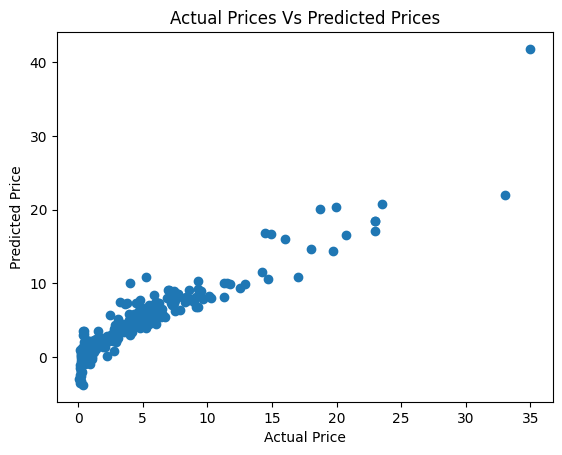

In [20]:
plt.scatter(Y_train, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [22]:
test_pred=lin_reg.predict(X_test)

In [24]:
error = metrics.r2_score(Y_test,test_pred)
print("R-squared Error:", error)

R-squared Error: 0.8365766715027051


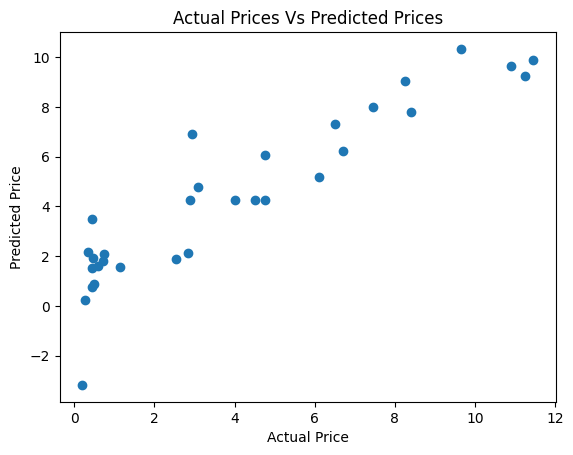

In [25]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

###2. LASSO REGRESSION(Generalisation)

In [26]:
las_reg = Lasso() #creating an object of linear regression model

In [27]:
las_reg.fit(X_train,Y_train) #here we are fitting the model on our Training dataset containing the dimensions and the label.

Lasso()

In [28]:
pred=las_reg.predict(X_train) # we perfrom a prediction on the basis of our input dimensions

In [29]:
error = metrics.r2_score(Y_train,pred)
print("R-squared Error:", error)

R-squared Error: 0.8427856123435794


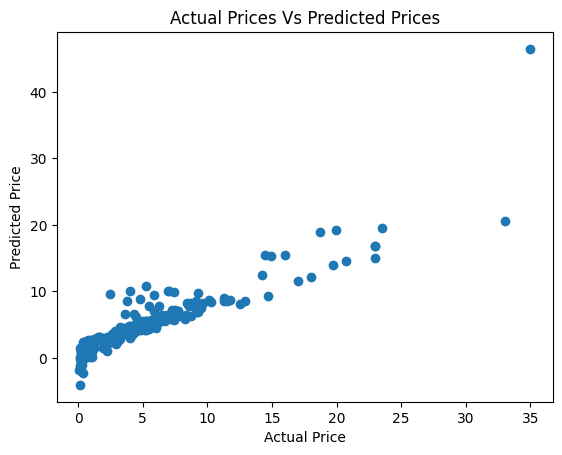

In [30]:
plt.scatter(Y_train, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [31]:
test_pred=las_reg.predict(X_test)

In [32]:
error = metrics.r2_score(Y_test,test_pred)
print("R-squared Error:", error)

R-squared Error: 0.8709167941173195


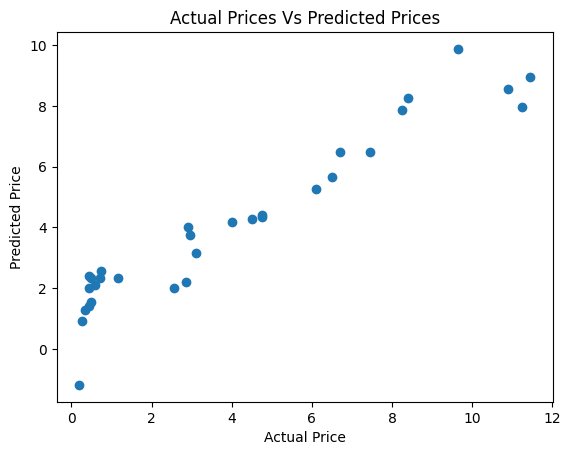

In [33]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()